In [1]:
library(cidr)

In [2]:
path1 = './data/processed/baron/subset_0/mat/rna.csv'
path2 = './data/b1/l1.csv'

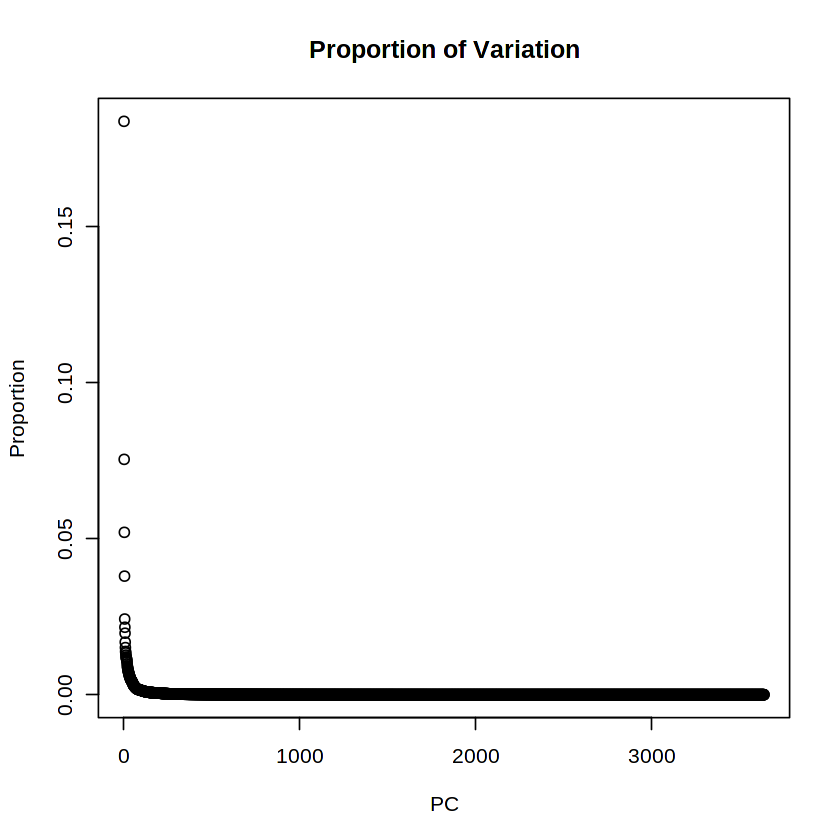

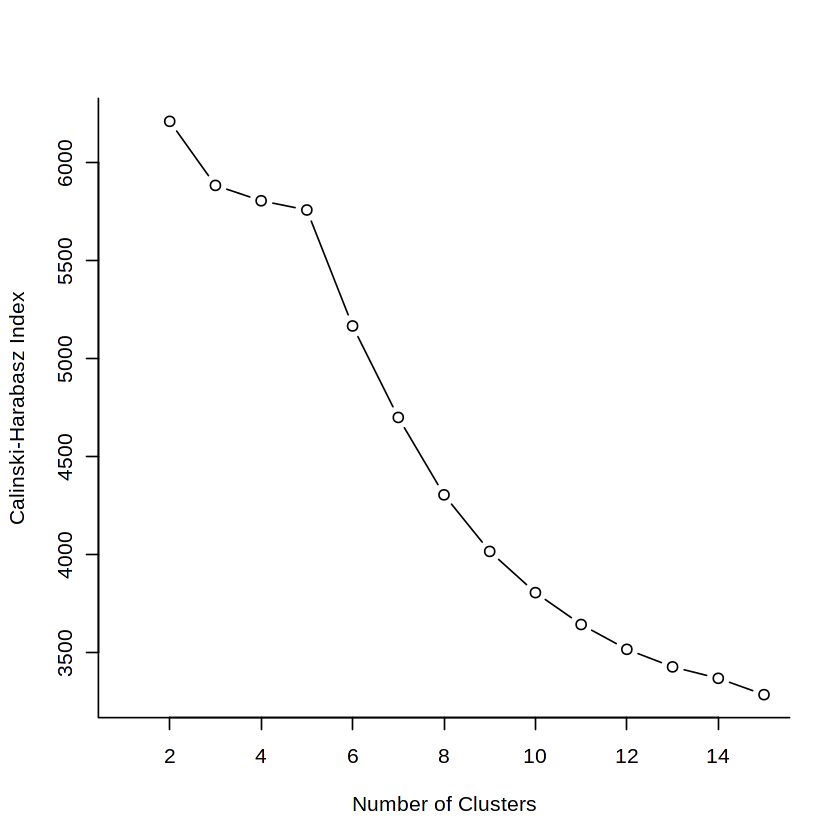

In [3]:
brainTags <- t(read.csv(path1,header = T, row.names = 1))
celltype <- t(read.csv(path2,header = T, row.names = 1))
celltype <- factor(celltype)
cols <- rep(NA,length(celltype))
priorTPM <- 1
brain10 <- brainTags[rowSums(brainTags)>10,] 
brain10_lcpm <- log2(t(t(brain10)/colSums(brain10))*1000000+priorTPM)
pca <- prcomp(t(brain10_lcpm))
scBrain <- scDataConstructor(as.matrix(brainTags)) 
scBrain <- determineDropoutCandidates(scBrain) 
scBrain <- wThreshold(scBrain) 
scBrain <- scDissim(scBrain)
scBrain <- scPCA(scBrain) 
scBrain <- nPC(scBrain) 
nCluster(scBrain) 
scBrain <- scCluster(scBrain)

In [4]:
scBrain@nCluster

[1] 5

In [5]:
write.csv(scBrain@clusters, "./data/b1/label_cidr.csv")